# Accessing the Euro-Cordex Ensemble

In [1]:
import os
import intake
import xarray as xr
import numpy as np
from tqdm.notebook import tqdm

os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

xr.set_options(keep_attrs=True)
np.__version__


'1.21.0'

In [2]:
!echo $HDF5_USE_FILE_LOCKING

FALSE


In [3]:
from dask.distributed import Client, progress
client = Client()

In [4]:
client

<Client: 'tcp://127.0.0.1:33869' processes=6 threads=36, memory=45.70 GiB>

In [5]:
#client.get_versions(check=True)

## Data access

In [6]:
url = "/work/kd0956/Catalogs/mistral-cordex.json" 
cat = intake.open_esm_datastore(url)
cat

In [7]:
models = ['CLMcom-CCLM4-8-17',
     'CLMcom-BTU-CCLM4-8-17',
    'CLMcom-ETH-COSMO-crCLIM-v1-1',
     'CNRM-ALADIN53',
     'CNRM-ALADIN63',
     'DMI-HIRHAM5',
     'GERICS-REMO2015',
   #  'ICTP-RegCM4-6',  # regcm seems to make trouble when opening with to_dataset_dict..
     'IPSL-INERIS-WRF331F',
     'KNMI-RACMO22E',
    'MOHC-HadREM3-GA7-05',
     'MPI-CSC-REMO2009',
     'RMIB-UGent-ALARO-0',
     'SMHI-RCA4',
     'UHOH-WRF361H']

In [8]:
#institute_ids = ['CLMcom', 'CLMcom-BTU', 'CLMcom-ETH', 'CNRM', 'DMI', 'GERICS',
#       'IPSL-INERIS', 'KNMI', 'MOHC', 'MPI-CSC', 'RMIB-UGent', 'SMHI',
#       'UHOH', 'z_GERICS_KB']
# there are some missleading entries in the catalog, so we state all institute ids explicitly here
# to avoid wrong ones...
institute_ids =  ['CLMcom', 'CLMcom-BTU', 'CLMcom-ETH', 'CNRM', 'DMI', 'GERICS',
        'ICTP', 'IPSL-INERIS', 'KNMI', 'MOHC', 'MPI-CSC', 'RMIB-UGent',
        'SMHI', 'UHOH', 'z_GERICS_KB']

In [9]:
scens = ['rcp26', 'rcp45', 'rcp85']
expts = ['historical'] + scens
attrs = {'variable_id': 'tas', 'frequency': 'mon', 'CORDEX_domain': 'EUR-11', 
         'experiment_id': expts, 'rcm_version_id': 'v1', 'model_id': models,
         'institute_id': institute_ids}

In [10]:
import pandas as pd
pd.set_option('display.max_rows', None)
selection = cat.search(**attrs)
selection.df.groupby(['model_id', 'institute_id', 'experiment_id', 'driving_model_id', 'member', 'frequency', 'rcm_version_id', 'version'])['variable_id'].unique().apply(list).to_frame()

variable_id
model_id                     institute_id experiment_id driving_model_id      member  frequency rcm_version_id version              
CLMcom-BTU-CCLM4-8-17        CLMcom-BTU   rcp26         MPI-M-MPI-ESM-LR      r1i1p1  mon       v1             v20171121       [tas]
CLMcom-CCLM4-8-17            CLMcom       historical    CCCma-CanESM2         r1i1p1  mon       v1             v20171121       [tas]
                                                        CNRM-CERFACS-CNRM-CM5 r1i1p1  mon       v1             v20140515       [tas]
                                                        ICHEC-EC-EARTH        r12i1p1 mon       v1             v20140515       [tas]
                                                        MIROC-MIROC5          r1i1p1  mon       v1             v20171121       [tas]
                                                        MOHC-HadGEM2-ES       r1i1p1  mon       v1             v20150320       [tas]
                                                        MPI-M-MPI-ESM-LR      r1i1p1  mon       v1             v20140515       [tas]
                                          rcp26         ICHEC-EC-EARTH        r12i1p1 mon       v1             v20170523       [tas]
                                                        MIROC-MIROC5          r1i1p1  mon       v1             v20180707       [tas]
                                          rcp45         CNRM-CERFACS-CNRM-CM5 r1i1p1  mon       v1             v20140515       [tas]
                                                        ICHEC-EC-EARTH        r12i1p1 mon       v1             v20140515       [tas]
                                                        MOHC-HadGEM2-ES       r1i1p1  mon       v1             v20150320       [tas]
                                                        MPI-M-MPI-ESM-LR      r1i1p1  mon       v1             v20140515       [tas]
                                          rcp85         CCCma-CanESM2         r1i1p1  mon       v1             v20171121       [tas]
                                                        CNRM-CERFACS-CNRM-CM5 r1i1p1  mon       v1             v20140515       [tas]
                                                        ICHEC-EC-EARTH        r12i1p1 mon       v1             v20140515       [tas]
                                                        MIROC-MIROC5          r1i1p1  mon       v1             v20171121       [tas]
                                                        MOHC-HadGEM2-ES       r1i1p1  mon       v1             v20150320       [tas]
                                                        MPI-M-MPI-ESM-LR      r1i1p1  mon       v1             v20140515       [tas]
CLMcom-ETH-COSMO-crCLIM-v1-1 CLMcom-ETH   historical    CNRM-CERFACS-CNRM-CM5 r1i1p1  mon       v1             v20210308       [tas]
                                                        ICHEC-EC-EARTH        r12i1p1 mon       v1             v20191210       [tas]
                                                                              r1i1p1  mon       v1             v20201215       [tas]
                                                                              r3i1p1  mon       v1             v20201209       [tas]
                                                        MOHC-HadGEM2-ES       r1i1p1  mon       v1             v20200609       [tas]
                                                        MPI-M-MPI-ESM-LR      r1i1p1  mon       v1             v20191219       [tas]
                                                                              r2i1p1  mon       v1             v20200211       [tas]
                                                                              r3i1p1  mon       v1             v20200424       [tas]
                                                        NCC-NorESM1-M         r1i1p1  mon       v1             v20191210       [tas]
                                          rcp85         CNRM-CERFACS-CNRM-CM5 r1i1p1  mon       v1             v20210430       [tas

In [11]:
selection.df.institute_id.unique()

array(['CLMcom', 'CLMcom-BTU', 'CLMcom-ETH', 'CNRM', 'DMI', 'GERICS',
       'IPSL-INERIS', 'KNMI', 'MOHC', 'MPI-CSC', 'RMIB-UGent', 'SMHI',
       'UHOH', 'z_GERICS_KB'], dtype=object)

In [12]:
dset_dict = selection.to_dataset_dict(cdf_kwargs = {"use_cftime": True, "chunks": {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'CORDEX_domain.driving_model_id.institute_id.model_id.experiment_id.frequency'


We move the member id from a coordinate to the dsets key so that all datasets have the same structure...

In [13]:
#dsets_sorted = defaultdict(dict)
keys = 'CORDEX_domain.driving_model_id.institute_id.model_id.experiment_id.frequency'.split('.')

dset_split = {}

for key, ds in tqdm(dset_dict.items()):
    attrs = dict(zip(keys, [attr for attr in key.split('.')]))
    for member, ds_member in ds.groupby('member'):
        dset_split[key+'.'+member] = ds_member

we concentrate on rotated pole grids for now. there are just a handful of lambert conformal projection models that we can deal later with.

In [14]:
def is_rotated(ds):
    rotated = ['rotated_pole', 'rotated_latitude_longitude']
    return any(rot in ds for rot in rotated)

dset_rotated = {key: dset for key, dset in dset_split.items() if is_rotated(dset)}
dset_other = {key: dset for key, dset in dset_split.items() if not is_rotated(dset)}
#list(dset_rotated.keys())

In [15]:
#ds = dset_rotated['EUR-11.MIROC-MIROC5.UHOH.UHOH-WRF361H.rcp85.mon.r1i1p1']
#ds.tas.assign_coords()

#.tas.isel(time=0)#.plot(x='rlon', y='rlat')

Now, we concatenate scenarion data with historical data for easier comparisons:

In [16]:
from tqdm.autonotebook import tqdm
from collections import defaultdict

#dsets_dict = defaultdict(dict)
keys = 'CORDEX_domain.driving_model_id.institute_id.model_id.experiment_id.frequency.member'.split('.')


# skip datasets, see issue: https://github.com/euro-cordex/py-cordex/issues/17
skip = ['EUR-11.MIROC-MIROC5.UHOH.UHOH-WRF361H.historical.mon.r1i1p1',
        'EUR-11.MPI-M-MPI-ESM-LR.UHOH.UHOH-WRF361H.historical.mon.r1i1p1',
        'EUR-11.MPI-M-MPI-ESM-LR.UHOH.UHOH-WRF361H.historical.mon.r1i1p1']



# this will make coordinates out of the dataset attributes

#for key, ds in tqdm(dset_rotated.items()):
#    attrs = dict(zip(keys, [[attr] for attr in key.split('.')]))
#    dsets_expanded[key] = ds.expand_dims(attrs)

# lets concatenate all scnearios with their historical part 
dsets_concat = defaultdict(dict)
for key, ds in tqdm(dset_rotated.items()):
    attrs = dict(zip(keys, [attr for attr in key.split('.')]))
    if attrs['experiment_id'] == 'historical' and key not in skip:
        #print(attrs)
        for exp_id in scens:
            # create the scenarion id and concat it with historical
            attrs['experiment_id'] = exp_id
            scen_key = '.'.join(attrs.values())
            if scen_key in dset_rotated:
                #print('concat: ', key, scen_key)
                ds_scen = dset_rotated[scen_key]
                dsets_concat[scen_key] = xr.concat([ds.squeeze(), ds_scen.squeeze()], dim='time', compat='override',
                                                  coords='minimal', data_vars='minimal')#.to_dataset()
                dsets_concat[scen_key].attrs = ds_scen.attrs
        #print(dset_key == key)
        #dsets_concat[key]

/tmp/ipykernel_41692/2333482241.py:1: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


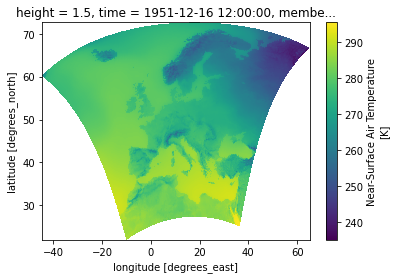

In [17]:
dsets_concat["EUR-11.ICHEC-EC-EARTH.MOHC.MOHC-HadREM3-GA7-05.rcp26.mon.r12i1p1"].tas.isel(time=0).plot(x='longitude', y='latitude')

Now, we have to align the different coordinats. The ensemble members might have slightly different rotated coordinates and also the projection to the global coordinates might be different. We use a reference dataset here, from wich we copy the coordinates to all datasets to make them comparable.

In [18]:
from datetime import datetime as dt

dsets_sorted = defaultdict(dict)
keys = 'CORDEX_domain.driving_model_id.institute_id.model_id.experiment_id.frequency.member'.split('.')
new_keys = 'driving_model_id.institute_id.model_id.member'.split('.')

ref_key = 'EUR-11.IPSL-IPSL-CM5A-MR.GERICS.GERICS-REMO2015.rcp85.mon.r1i1p1'

ref_ds = dset_dict['EUR-11.ICHEC-EC-EARTH.GERICS.GERICS-REMO2015.historical.mon'] 

#rlon = dsets_concat[ref_key].rlon
#rlat = dsets_concat[ref_key].rlat
#lon = dsets_concat[ref_key].lon
#lat = dsets_concat[ref_key].lat

rlon = ref_ds.rlon
rlat = ref_ds.rlat
lon = ref_ds.lon
lat = ref_ds.lat

for key, ds in tqdm(dsets_concat.items()):
    attrs = dict(zip(keys, [attr for attr in key.split('.')]))
    # overwrite all coordinates consistently, we use the ref datasets coordinates here...
    try:
        # rename
        ds = ds.rename({'latitude': 'lat', 'longitude': 'lon'})
        #ds.drop('longitude')
        print("renaming coords on "+key)
    except:
        pass
    ds.coords['time'] = [dt(date.year, date.month, 15) for date in ds.time.values]
    ds['rlon'] = rlon
    ds['rlat'] = rlat
    ds['lon'] = lon
    ds['lat'] = lat
    
    new_key = '.'.join([attrs[attr] for attr in new_keys])
    
    scen = attrs['experiment_id']
    dsets_sorted[scen][new_key] = ds.squeeze(drop=True)
    #print(new_key)

renaming coords on EUR-11.MOHC-HadGEM2-ES.MOHC.MOHC-HadREM3-GA7-05.rcp26.mon.r1i1p1
renaming coords on EUR-11.MOHC-HadGEM2-ES.MOHC.MOHC-HadREM3-GA7-05.rcp85.mon.r1i1p1
renaming coords on EUR-11.NCC-NorESM1-M.MOHC.MOHC-HadREM3-GA7-05.rcp85.mon.r1i1p1
renaming coords on EUR-11.MPI-M-MPI-ESM-LR.MOHC.MOHC-HadREM3-GA7-05.rcp85.mon.r1i1p1
renaming coords on EUR-11.ICHEC-EC-EARTH.MOHC.MOHC-HadREM3-GA7-05.rcp26.mon.r12i1p1
renaming coords on EUR-11.ICHEC-EC-EARTH.MOHC.MOHC-HadREM3-GA7-05.rcp85.mon.r12i1p1



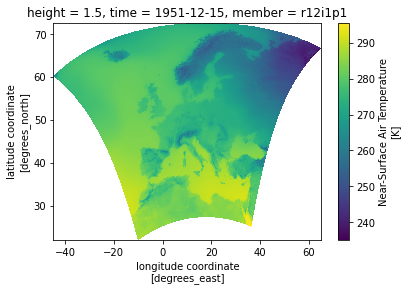

In [19]:
dsets_sorted['rcp26']['ICHEC-EC-EARTH.MOHC.MOHC-HadREM3-GA7-05.r12i1p1'].tas.isel(time=0).plot(x='lon', y='lat')#.drop('latitude')

The idea to make the whole dataset id a coordinate, so that xarray will automatically do all stuff for all datasets...

In [20]:
# make the dataset id a coordinate for easier access
dims = {}
for rcp, dsets in dsets_sorted.items():
    dset_ids = list(dsets.keys())
    dim = xr.DataArray(dset_ids, dims='dset_id', name='dset_id',
                      coords={'dset_id': dset_ids})
    dims[rcp] = dim

we create three big datasets for each senario one:

In [21]:
ensemble_dict = {}

for scen, dsets in dsets_sorted.items():
    print(scen)
    ensemble_dict[scen] = xr.concat([ds.tas for ds in dsets.values()], dim=dims[scen], 
                                    coords='minimal', compat='override')

rcp26
rcp85
rcp45


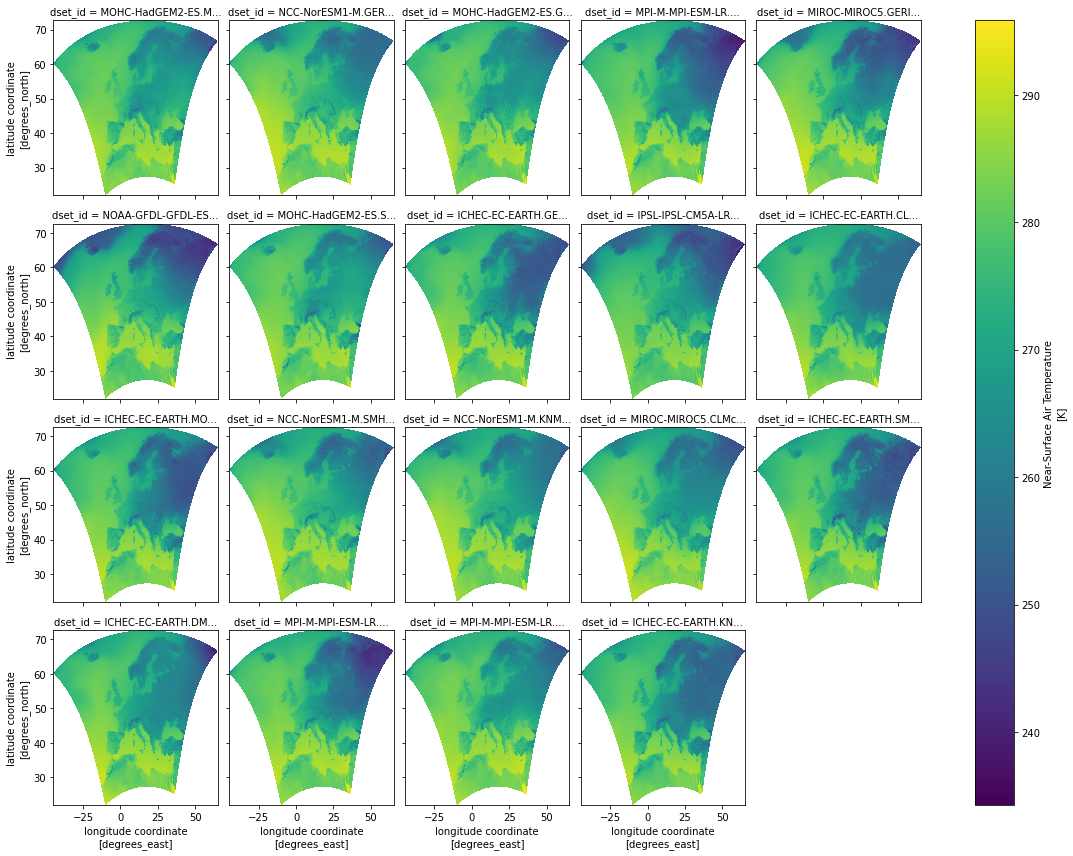

In [22]:
ensemble_dict['rcp26'].sel(time="1970-01").plot(col="dset_id", col_wrap=5, x='lon', y='lat')

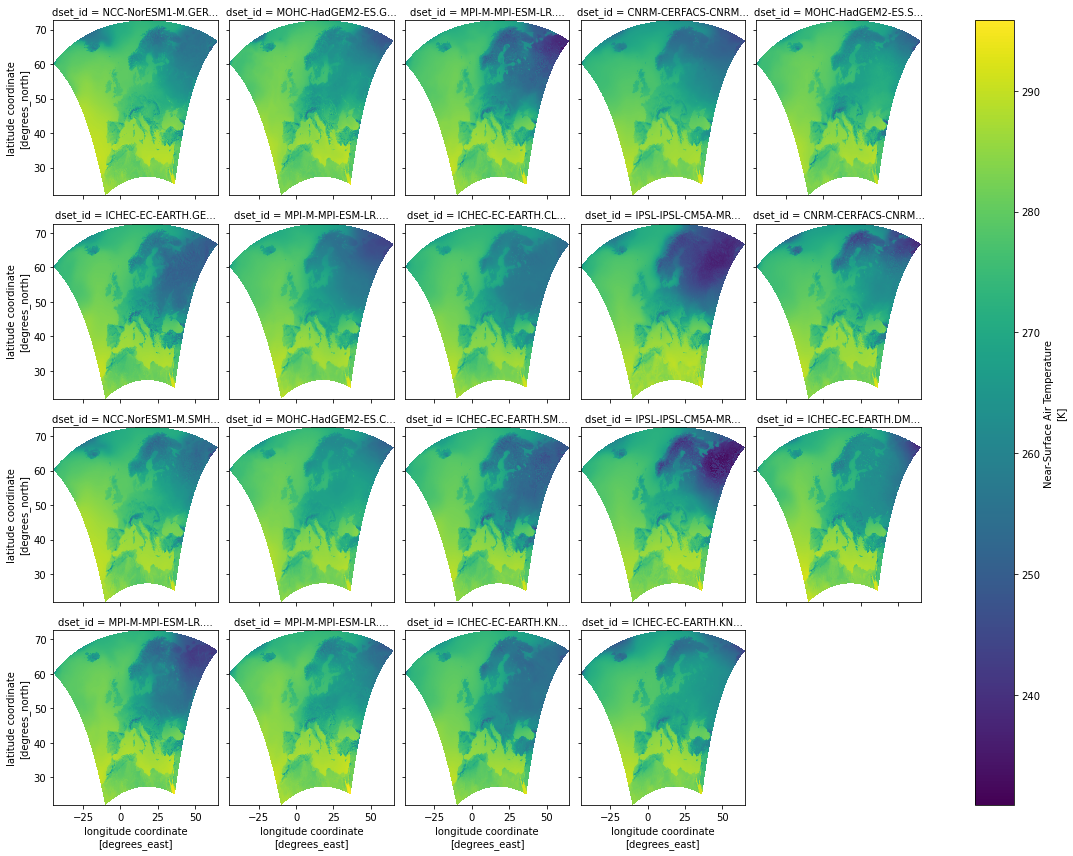

In [23]:
ensemble_dict['rcp45'].sel(time="1970-01").plot(col="dset_id", col_wrap=5, x='lon', y='lat')

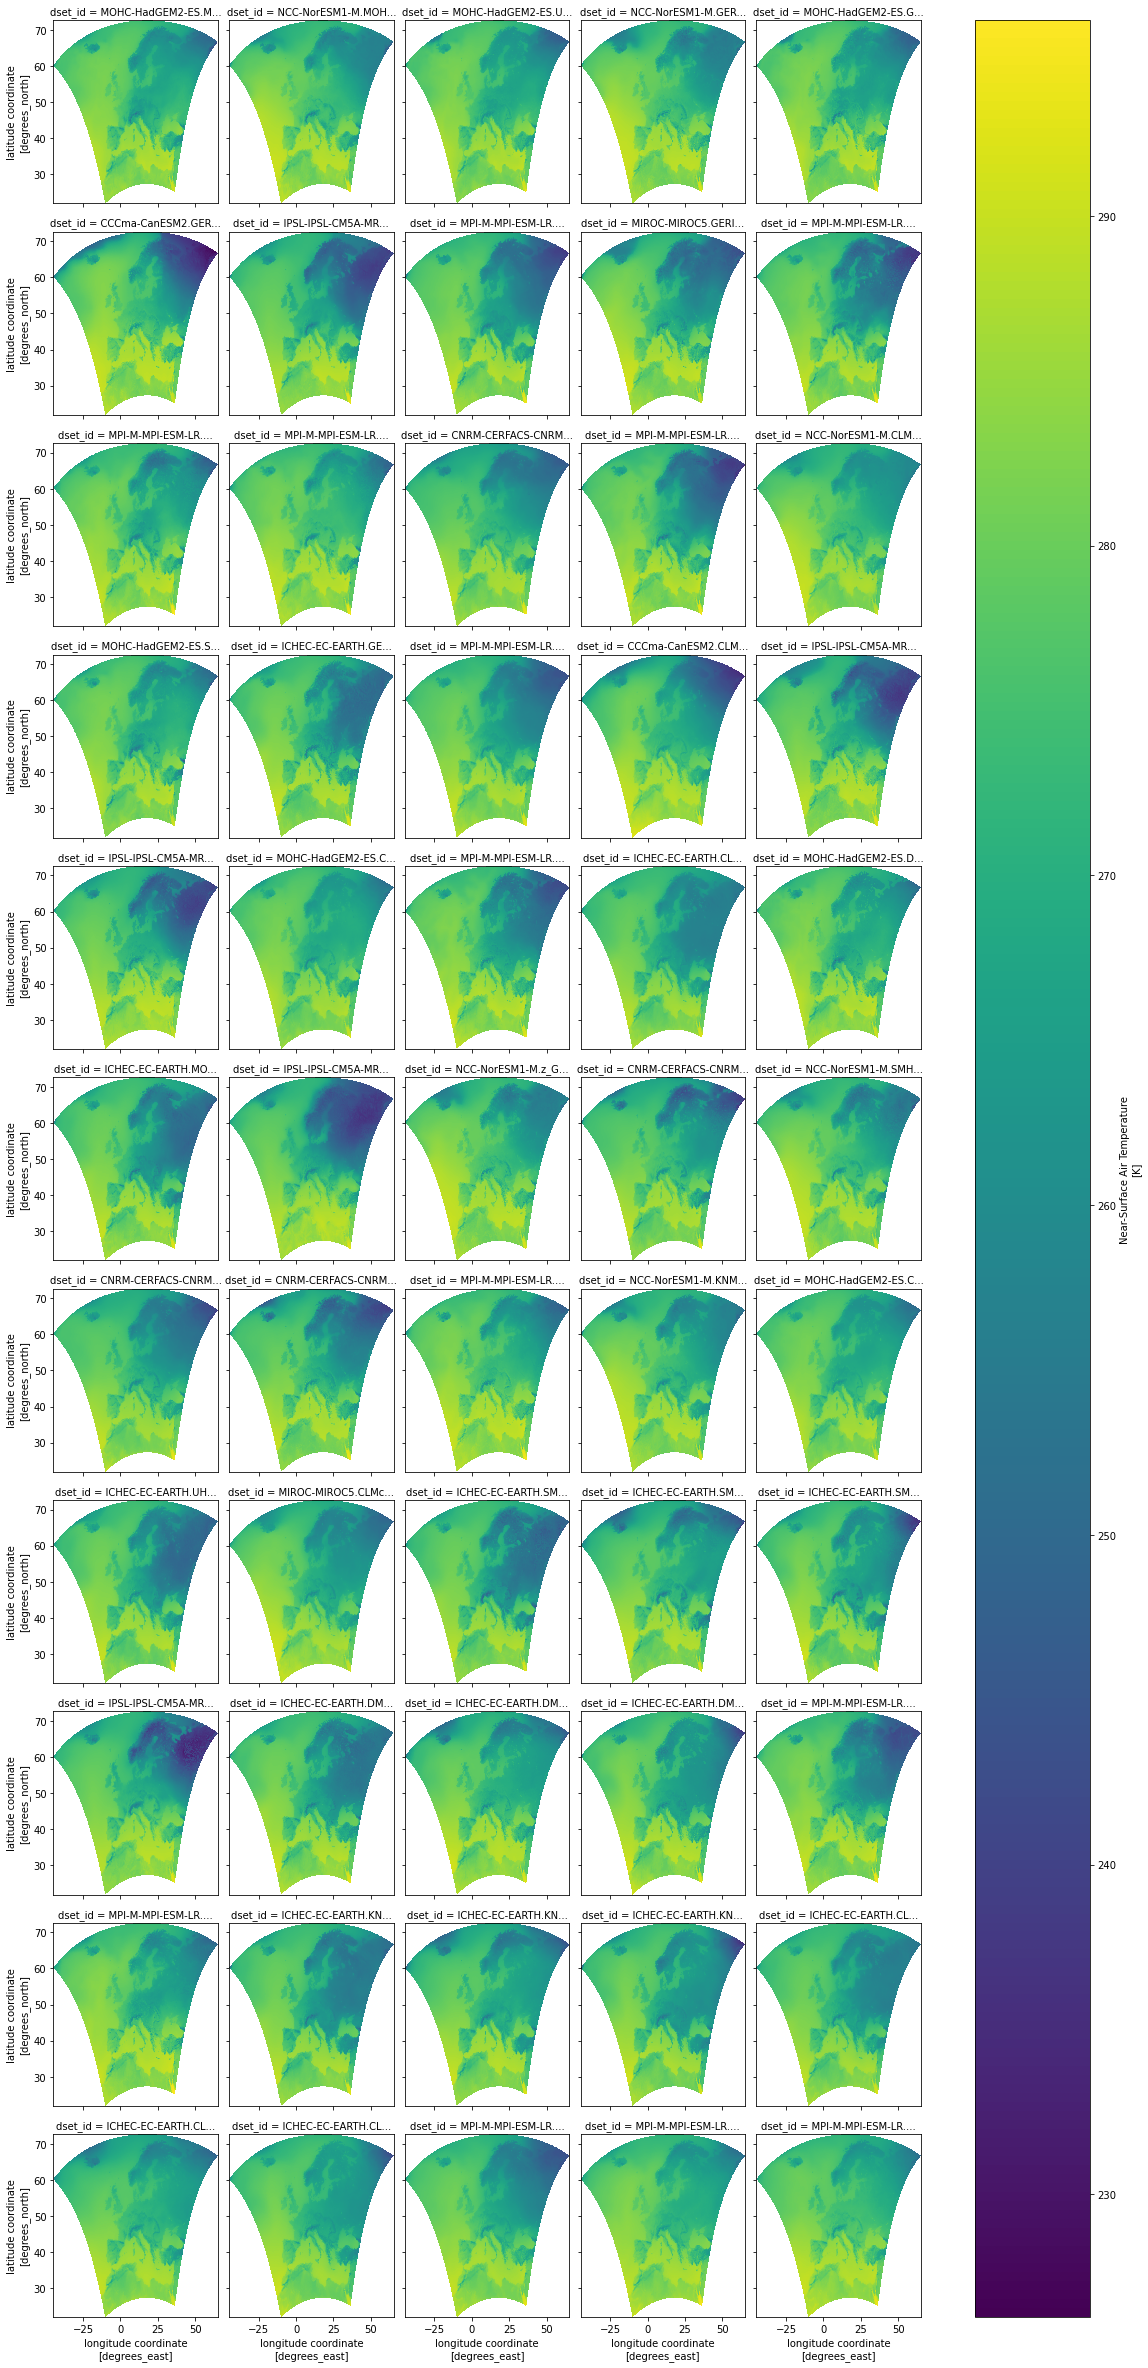

In [24]:
ensemble_dict['rcp85'].sel(time="1970-01").plot(col="dset_id", col_wrap=5, x='lon', y='lat')

In [25]:
def compute_annual_change(ds, ref_period=slice("1970", "2000")):
    import dask
    with dask.config.set(**{'array.slicing.split_large_chunks': False}):
        reference = ds.sel(time=ref_period).mean(dim="time")
        return ds.groupby("time.year").mean(dim="time") - reference

In [26]:
changes = {scen: compute_annual_change(ds) for scen, ds in ensemble_dict.items()}

Now, we write our results to disk to save our gridded data. The datasets are quite big, e.g., the size of the rcp85 ensemble in the memory would be:

In [48]:
changes['rcp85'].nbytes / 1.e9 #GB

11.75999616

## writing results to disk

So, the best way seems to be to compute and write those results to disk to make our memory available for further computations. We will trigger the computation now by writing a Netcdf file for each experiment id.

In [27]:
%time changes['rcp26'].to_netcdf("/scratch/g/g300046/EUR-11_changes_rcp26.nc")

CPU times: user 50.6 s, sys: 2.9 s, total: 53.5 s
Wall time: 2min 11s


In [28]:
%time changes['rcp45'].to_netcdf("/scratch/g/g300046/EUR-11_changes_rcp45.nc")

CPU times: user 1min 5s, sys: 3.35 s, total: 1min 8s
Wall time: 2min 25s


In [29]:
%time changes['rcp85'].to_netcdf("/scratch/g/g300046/EUR-11_changes_rcp85.nc")

CPU times: user 4min 20s, sys: 13.3 s, total: 4min 33s
Wall time: 9min 33s


Now, we will read back our data from disk, so that we can easily work with that data without persisting in in memory.

In [30]:
changes_rcp26 = xr.open_dataset("/scratch/g/g300046/EUR-11_changes_rcp26.nc", chunks="auto", use_cftime=True)
changes_rcp45 = xr.open_dataset("/scratch/g/g300046/EUR-11_changes_rcp45.nc", chunks="auto", use_cftime=True)
changes_rcp85 = xr.open_dataset("/scratch/g/g300046/EUR-11_changes_rcp85.nc", chunks="auto", use_cftime=True)

In [32]:
timeseries_rcp26 = changes_rcp26.mean(dim=('rlon', 'rlat')).compute()
timeseries_rcp45 = changes_rcp45.mean(dim=('rlon', 'rlat')).compute()
timeseries_rcp85 = changes_rcp85.mean(dim=('rlon', 'rlat')).compute()

We can also now concatenate all scenario datasets into one big ensemble dataset for easy exploration.

In [33]:
rcps = ['rcp26', 'rcp45', 'rcp85']
rcp_dim = xr.DataArray(rcps, dims='experiment_id', name='experiment_id',
                      coords={'experiment_id': rcps})
ensemble = xr.concat([timeseries_rcp26, timeseries_rcp45, timeseries_rcp85], dim=rcp_dim)

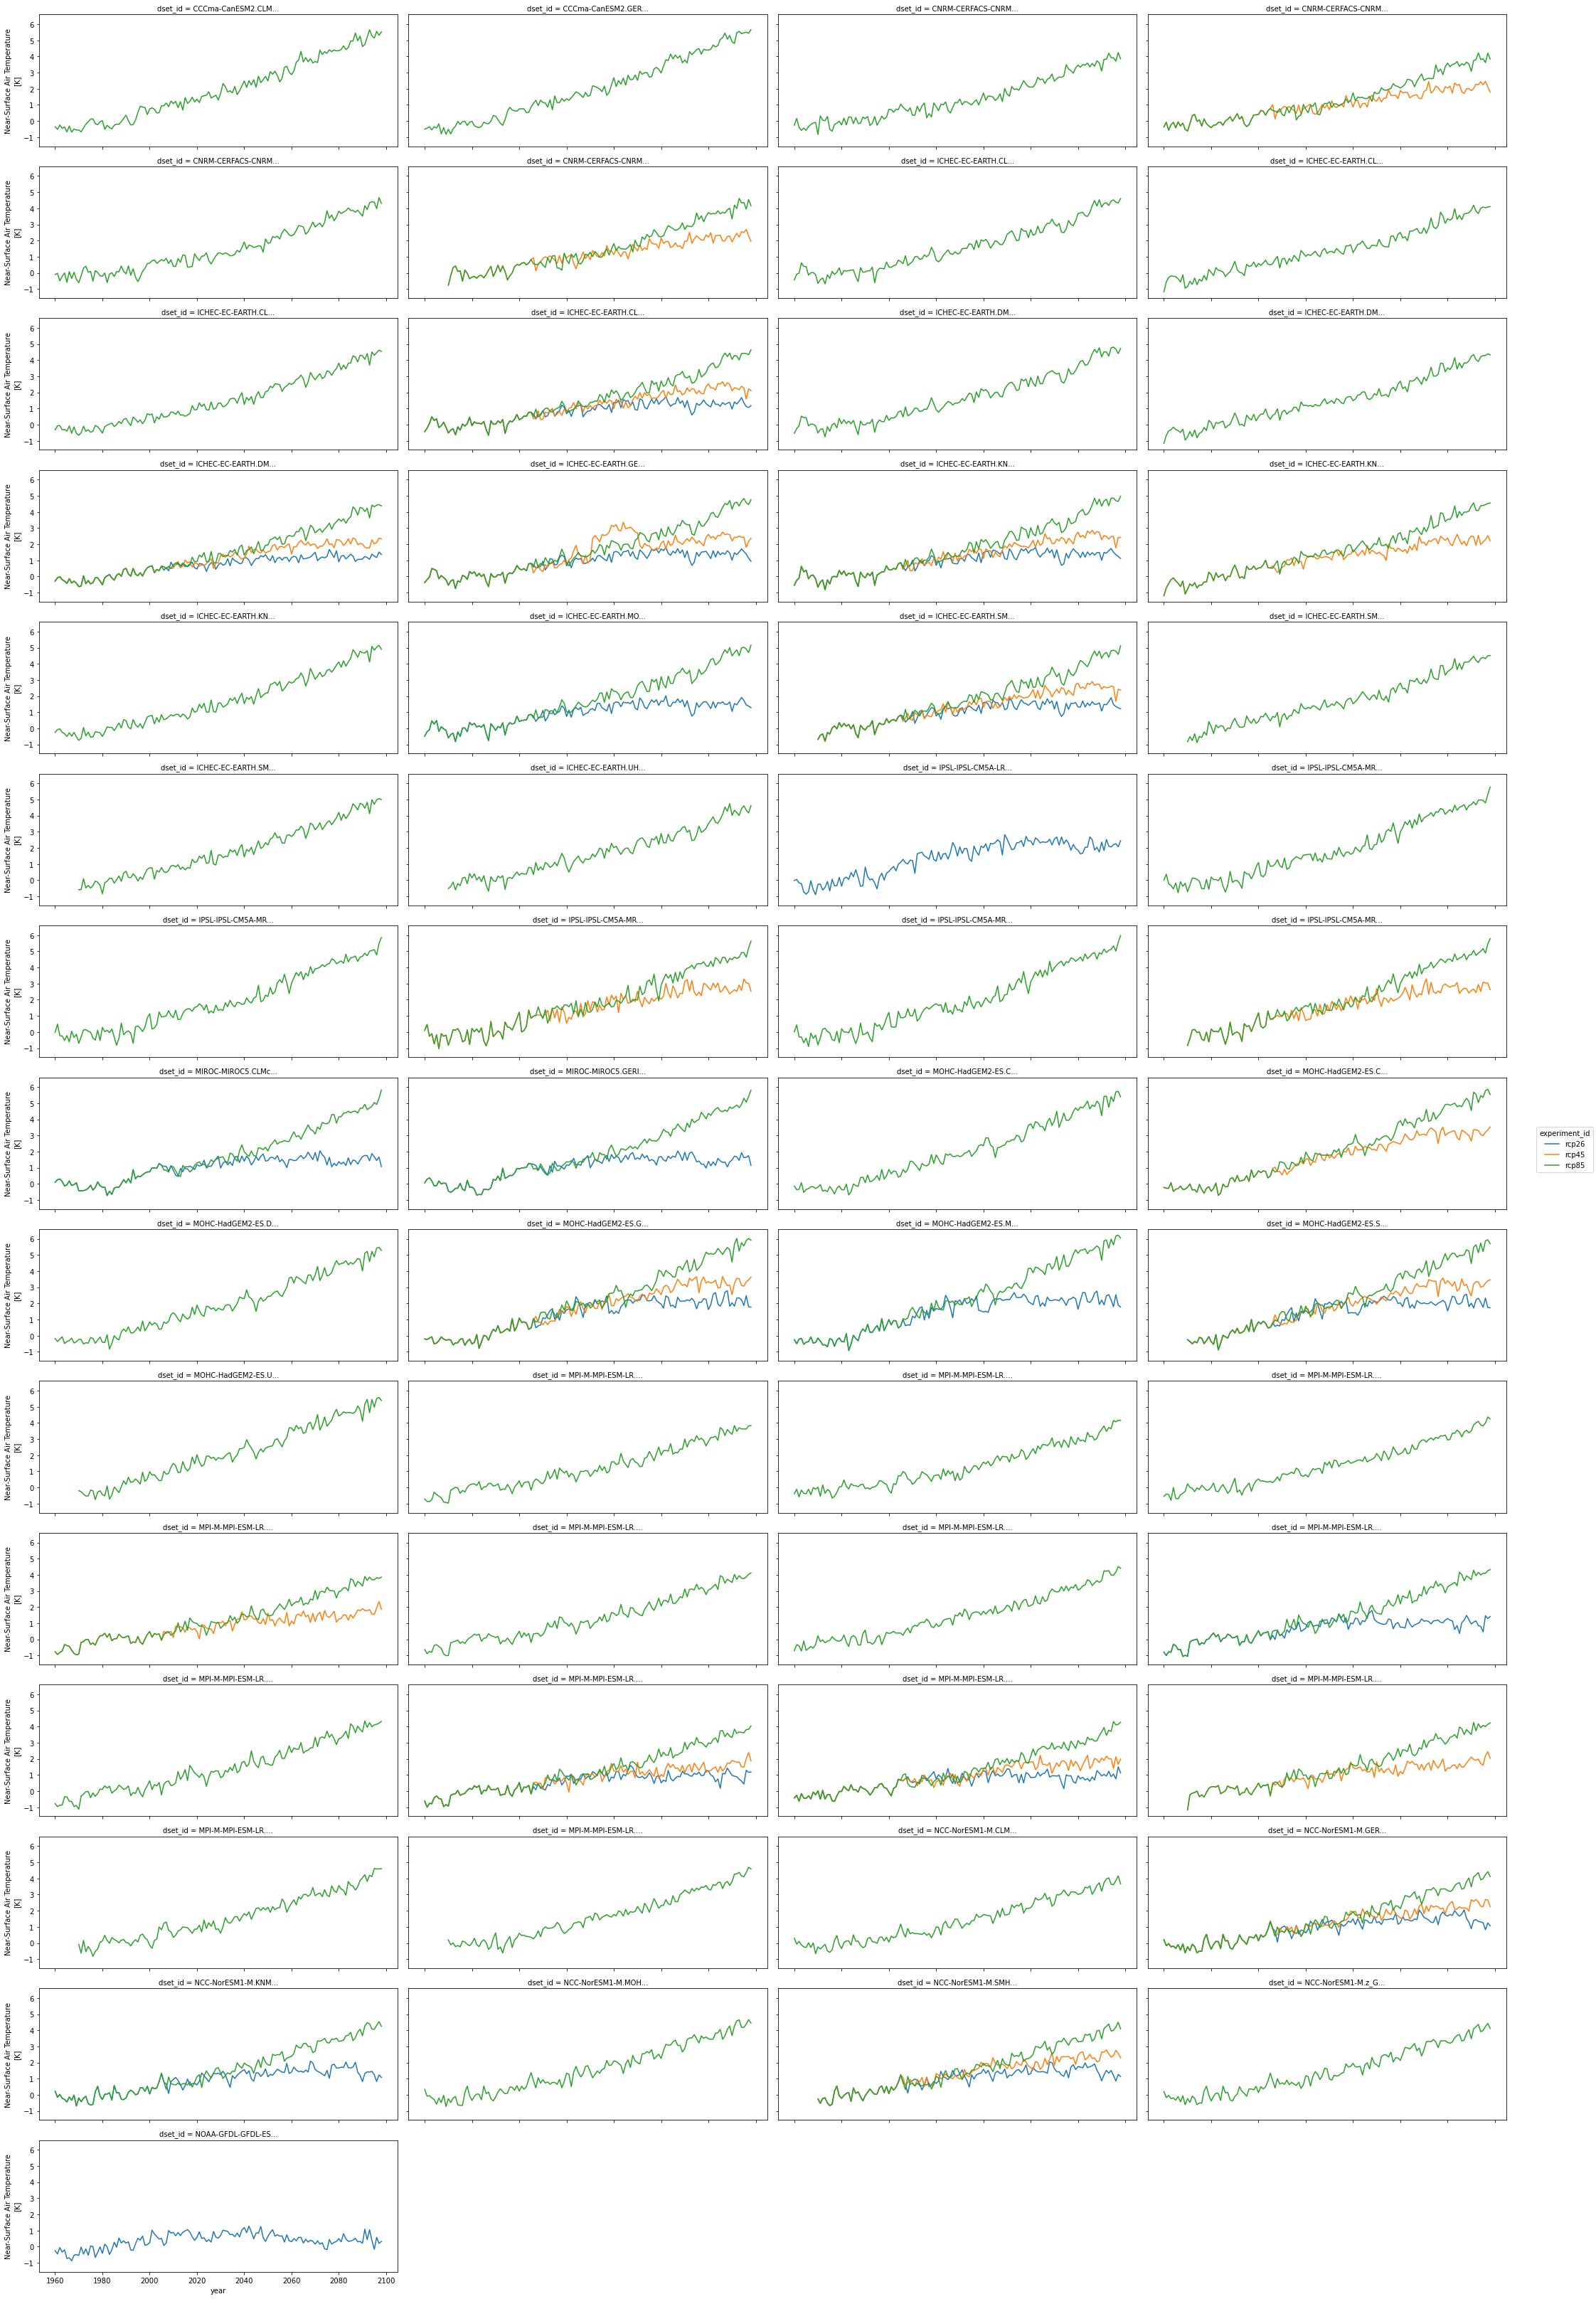

In [55]:
ensemble.tas.sel(year=slice(1960,2098)).plot(col='dset_id', col_wrap=4, hue="experiment_id", figsize=(30,45))

In [35]:
df = ensemble.tas.sel(year=slice(1960,2098)).to_dataframe().reset_index()

In [36]:
# drop empty entries
df = df.drop(df[df.tas.isnull()].index)

In [38]:
df.head()

experiment_id                                          dset_id  year  \
1251         rcp26  ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1960   
1252         rcp26  ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1961   
1253         rcp26  ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1962   
1254         rcp26  ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1963   
1255         rcp26  ICHEC-EC-EARTH.CLMcom.CLMcom-CCLM4-8-17.r12i1p1  1964   

      height  member       tas  
1251     1.5  r1i1p1 -0.427760  
1252     1.5  r1i1p1 -0.215331  
1253     1.5  r1i1p1  0.073949  
1254     1.5  r1i1p1  0.491406  
1255     1.5  r1i1p1  0.265898

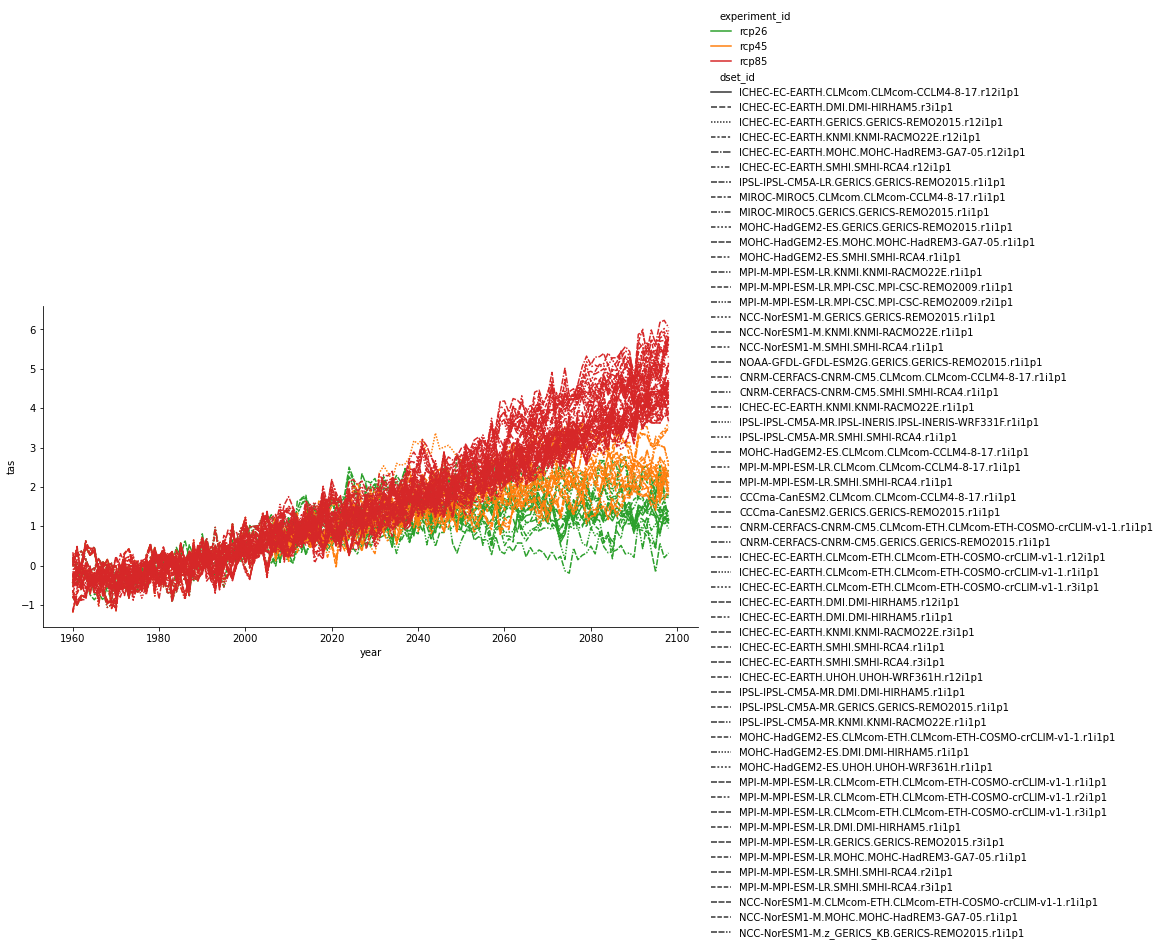

In [45]:
import seaborn as sns
palette ={"historical": "C0", "rcp26": "C2", "rcp45": "C1", "rcp85": "C3"}
sns.relplot(data=df,
            x="year", y="tas", hue='experiment_id',
            kind="line", style='dset_id', aspect=2, palette=palette);

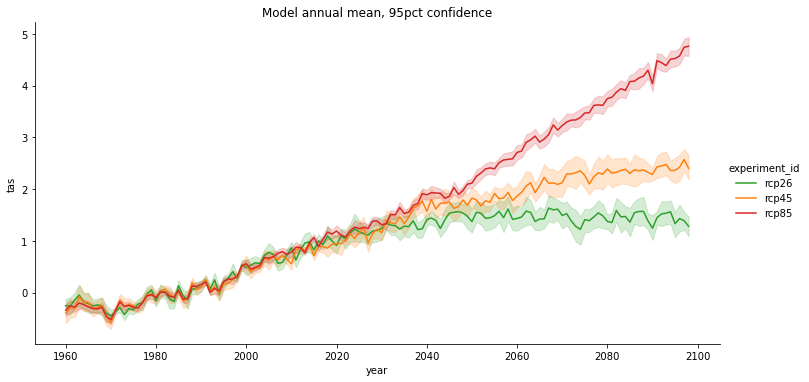

In [46]:
g = sns.relplot(data=df,
            x="year", y="tas", hue="experiment_id",
            kind="line", ci=95, aspect=2, palette=palette);
g.set(title="Model annual mean, 95pct confidence")

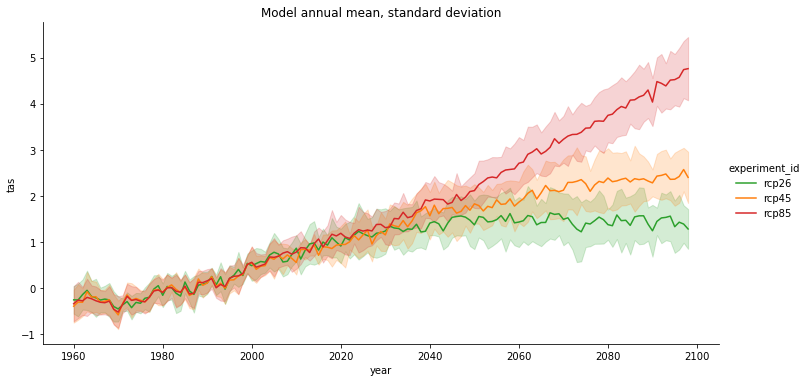

In [47]:
g = sns.relplot(data=df,
            x="year", y="tas", hue="experiment_id",
            kind="line", ci='sd', aspect=2, palette=palette);
g.set(title="Model annual mean, standard deviation")